# National Coding Week Excercises - Python!

## What is this?
This is a jupyter notebook. It is set up with all the data and software dependencies you need to have a go at coding in R/Python. 

## How do I use it?
You can run code by clicking in the code cell and pressing `ctrl`/`cmd` + `enter` or clicking the run button (below)

<img src="images/run-code.png" alt="image" style="height:150px;padding:10px;"/>

You can insert a new code 'chunk' by clicking the + button at the top left of the page (right image) 

<img src="images/insert-code-chunk-1.png" alt="image" style="height:150px;padding:10px;"/>

...and selecting code or markdown with the dropdown (left image).

<img src="images/code-markdown.png" alt="image" style="height:150px;padding:10px;"/>

## Before you start!

Make sure you set the language to python using the change kernel option.

<img src="images/set-kernel.png" alt="image" style="height:150px;padding:10px;"/>

# Coding Challenges:

Try coding in python by having a go at one of our challenges.

## Questions to answer:
* Which city has had the biggest temperature change?
* Which city has had the smallest temperature change?
* Can you make a plot of annual temperature changes for each city or region?
* Can you make a map of temperature changes?

## The Data

The dataset is a collection of daily temperature readings (daing back to 1995) from cities across the globe (split into 7 regions). It was [sourced from Kaggle](https://urldefense.com/v3/__https://www.kaggle.com/sudalairajkumar/daily-temperature-of-major-cities__;!!B5cixuoO7ltTeg!VmyCRKJvUbBaoB1rIWd1Ezp25KhK_RXICmsF3Tb54-BWsWlc7hoe52qBgCNaTSoekJyg$ ) ([original source](https://urldefense.com/v3/__https://academic.udayton.edu/kissock/http/Weather/default.htm__;!!B5cixuoO7ltTeg!VmyCRKJvUbBaoB1rIWd1Ezp25KhK_RXICmsF3Tb54-BWsWlc7hoe52qBgCNaTQqNH_NC$ )) and tidied up a bit to encode missing values and remove data before 995 (there were some readings for year 200 making it difficult to work with). 

The data is stored in the `data` folder. There is one csv of daily temperatures per region. A dataset of monthly mean temperatures for each city is also included in the `data` folder. This is easier to work with because it is much smaller than the daily temperature files. 

## Getting Started

If you are new to python and Pandas Series, have a read through [this cheatsheet](https://urldefense.com/v3/__http://datacamp-community-prod.s3.amazonaws.com/f04456d7-8e61-482f-9cc9-da6f7f25fc9b__;!!B5cixuoO7ltTeg!VmyCRKJvUbBaoB1rIWd1Ezp25KhK_RXICmsF3Tb54-BWsWlc7hoe52qBgCNaTeyjH25A$ ). It will give you the basics of processing and analysis.

# Basics

## Loading packages

Python is built on packages which do different things. To use them you need to load them with `import package_name`. Use `import package_name as short_package_name` to facilitate writing when coding. The following are already installed, load them using this code: 

In [10]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt  
import datetime

## Loading the data
You can load the data using the `read_csv` function with the path to the file as the first argument. Don't forget to assign the result. 
E.g.

In [11]:
city_temps = pd.read_csv("data/monthly-mean-temps.csv")

# Daily Temperatures

Use the glob package and the glob function to list all files names. Later use pd.concat together with a for loop to load all the daily csv files into one table.

In [12]:
all_daily_filenames = [i for i in glob.glob('data/daily*csv')]

In [13]:
all_daily_filenames

['data/daily-temperature-australia-south-pacific.csv',
 'data/daily-temperature-north-america.csv',
 'data/daily-temperature-middle-east.csv',
 'data/daily-temperature-africa.csv',
 'data/daily-temperature-asia.csv',
 'data/daily-temperature-europe.csv']

In [14]:
All_Daily_Temp = pd.concat([pd.read_csv(f) for f in all_daily_filenames])

Use the head function to view the data frame. Specify the number of rows as an argument.

In [15]:
All_Daily_Temp.head(5)

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Australia/South Pacific,Australia,NaN,Brisbane,1,1,1995,76.1
1,Australia/South Pacific,Australia,NaN,Brisbane,1,2,1995,78.3
2,Australia/South Pacific,Australia,NaN,Brisbane,1,3,1995,78.6
3,Australia/South Pacific,Australia,NaN,Brisbane,1,4,1995,78.6
4,Australia/South Pacific,Australia,NaN,Brisbane,1,5,1995,78.3


Since we can access elements in various ways, in order to remove any ambiguity to whether we are referring to an index label or numerical index,Pandas Series have two attributes, .loc and .iloc to explicitly state what we mean.
The attribute .loc stands for location and it is used to explicitly state that we are using a labeled index.
The attribute .iloc stands for integer location and it is used to explicitly state that we are using a numerical index.

The specification is as follow: .loc[row,column] - use ":" to specify all rows or all columns.For instance below we are selecting all rows and only the City, Year, and AvgTemperature colums.

In [16]:
city_data=All_Daily_Temp.loc[:,['City','Year','AvgTemperature']]

Use the groupby function to group the data by Year or City for example. It's important to specify by which function you would like to group your data with; for instance, in this case we would like to averagethe temperature data by year, with the function .mean(). Check out python and pandas documentation to find out other mathematical functions such as .max() or .sum(). For instance, below:

In [17]:
city_data_meantemp=(city_data.groupby(["City","Year"]).mean()).reset_index()

When you have a dataframe you can decide whether you want a column to be an index or not. Depending on the circumstance you can decide wheter you would like the index to be a column or just an additional numbered column. ".reset_index()" will reset the index to a numbered column from starting from 0.

Below we will start at an attempt to aswer the question: Which city has had the biggest temperature change? We are doing this by taking the average temeperature by each city in 1995 and subtracting it from the 2020 result. note there are more precise and better ways of doing this; this is just a simple example to show how to work around with data using Python and Pandas. In fact, one of the task for you will be: 

* Is the data clean and ready to use? 
* How can we make this code more efficient? (using less lines of code?)
* How can we better answer this question? As it will be possible to see from the results of this answer taking the average duing one year gives innacurate results. How can this be avoided? Moreover, is it possible that the there are anomalies in the data (refering back to the first question above)?



Below we are creating two new dataframes - one for 1995 and one for 2020 mean temperature.

In [18]:
city_data_1995=(city_data_meantemp)[city_data_meantemp.loc[:,'Year'] == 1995]

In [19]:
city_data_2020=(city_data_meantemp)[city_data_meantemp.loc[:,'Year'] == 2020]

Below we are setting the index as City so that when the two tables are combined each average temperature from 2020 and 1995 is corrently merged to it's respective city.

In [20]:
city_data_1995=city_data_1995.set_index(["City"])
city_data_2020=city_data_2020.set_index(["City"])

To create a blank data frame we use pd.DataFrame(). Let's see how to populate an empty dataframe using the city_data_1995 and city_data_1995 tables.

In [21]:
city_2020and1995_data = pd.DataFrame()
city_2020and1995_data = city_data_1995
del city_data_1995['Year']

Below we are adding city_data_1995['AvgTemperature'] and city_data_2020['AvgTemperature'] to the new empty dataframe city_2020and1995_data and renaming it to ["AvgTemperature 1995"] and ["AvgTemperature 2020"], respectively.

In [22]:
city_2020and1995_data["AvgTemperature 2020"] = city_data_2020['AvgTemperature']
city_2020and1995_data["AvgTemperature 1995"] = city_data_1995['AvgTemperature']
del city_2020and1995_data['AvgTemperature']

Lets create a new column that calculates the difference between "AvgTemperature 2020" and "AvgTemperature 1995"

In [23]:
city_2020and1995_data["Difference"] = city_2020and1995_data["AvgTemperature 2020"] - city_2020and1995_data["AvgTemperature 1995"]

In [24]:
city_2020and1995_data.head(5)

,AvgTemperature 2020,AvgTemperature 1995,Difference
City,,,
Abidjan,83.607463,80.085479,3.521983
Abilene,57.204478,63.397808,-6.193331
Abu Dhabi,71.619403,80.678082,-9.058679
Addis Ababa,65.178195,60.083014,5.095182
Akron Canton,40.686567,49.292055,-8.605488


What city has the maximum difference? Can you figure out what functions can be used? or even better have a go at coding the function yourself if you would like!

# Plotting

Python allows you to plot in many different ways - there are endless opportunities. The most common package for plotting is matplotlib. neverthless, there are other packages and codes out there that can be used for different purposes. Below you can find the plot for the difference change between 1995 and 2020 for each city.

Use plot.bar tp plot a bar chart - check Matplotlib documentation to better understand all the different arguments that can be used. In this case "figsize" indicates the figure size. Moreover, ylabel is used to label the y axis. 

Text(0, 0.5, 'Temperature Difference')

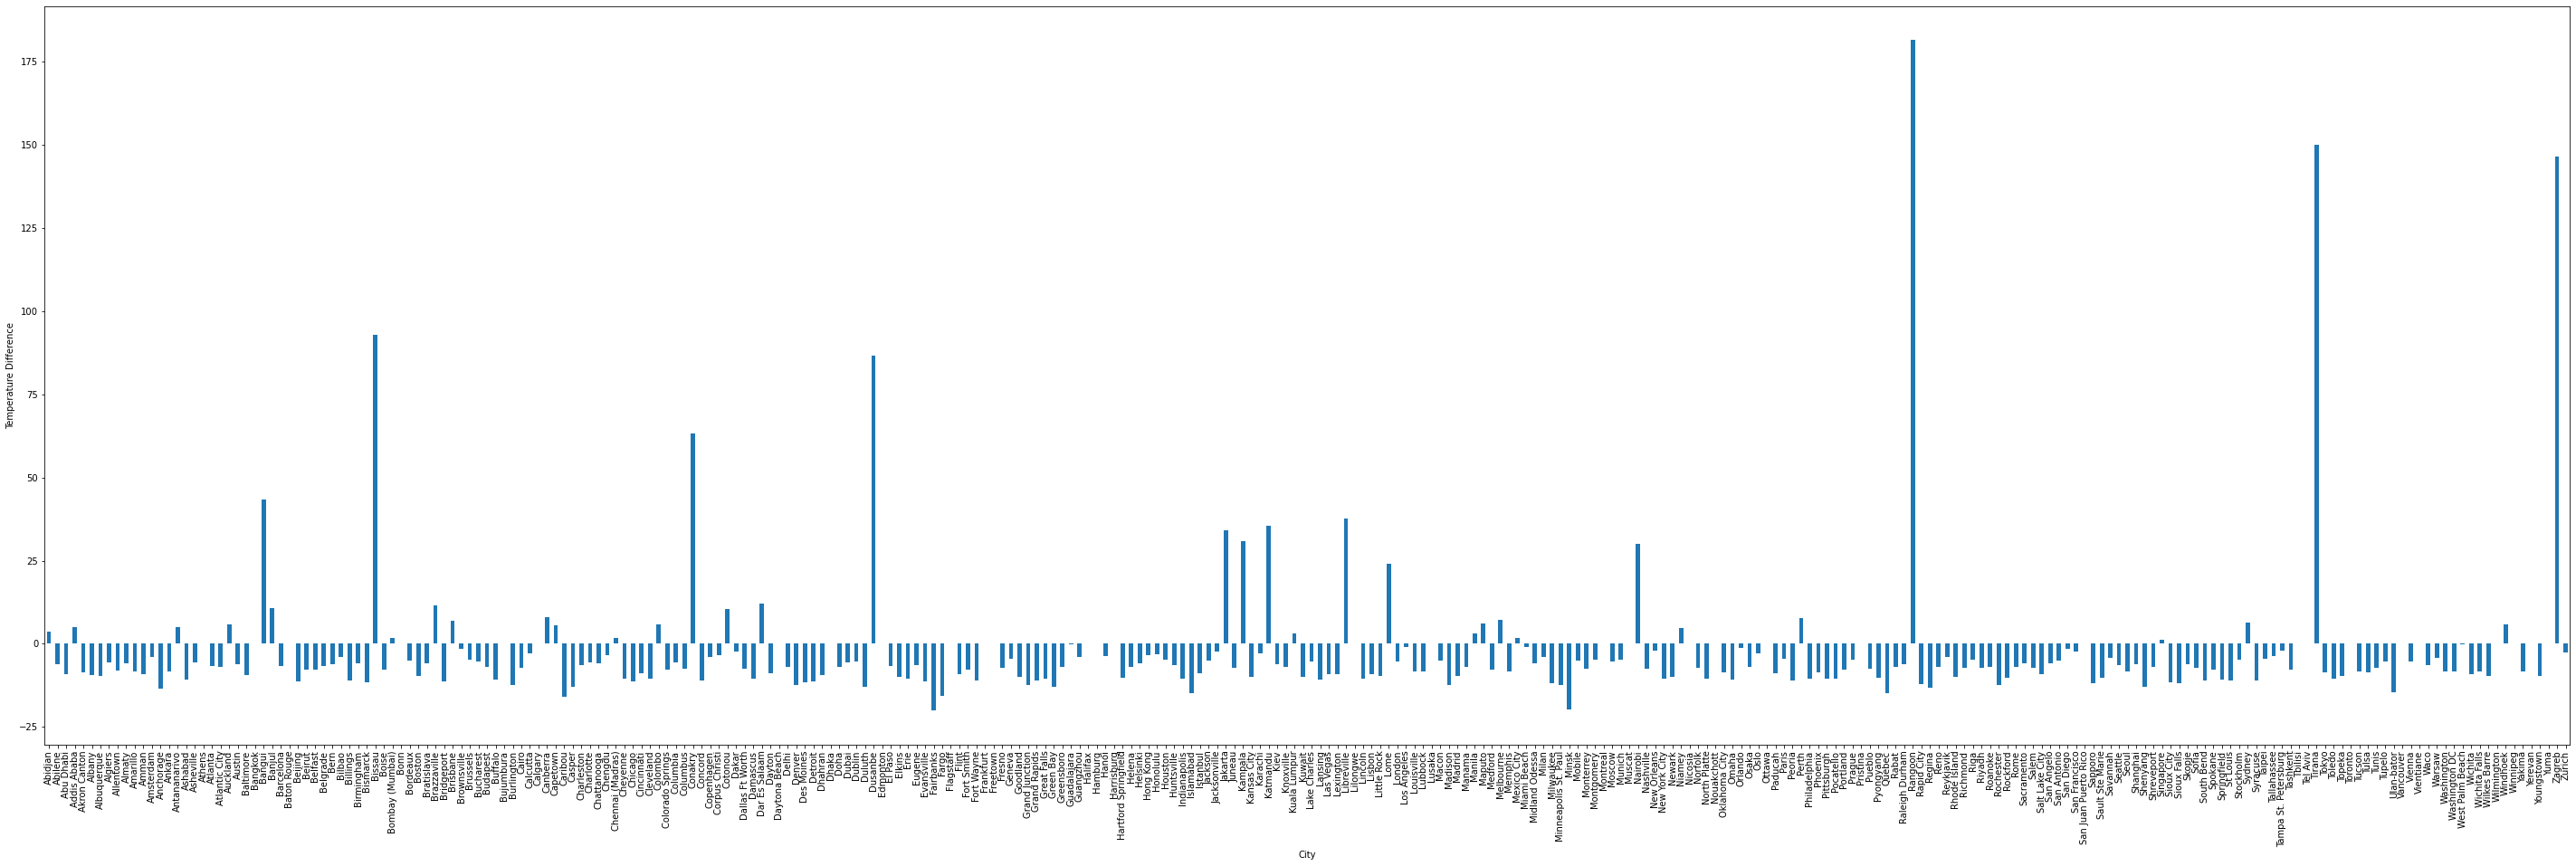

In [25]:
city_2020and1995_data["Difference"].plot.bar(figsize=(50,15))
plt.ylabel('Temperature Difference')

Can you think of a better plot? Check out Matplotlib documentation and tutorials to learn all the cool things you can do!!

Now have a go and answer the rest of the questions! Feel free to take any approach you would like ! The purpose is to learn, have fun, and discover all the cool ways you can manage data with python (endless possibilities!).